이동거리,시간(월/일 단위)
1. Koyang_Bike_Data(월 단위 구분_이동거리,시간)
2. Koyang_Bike_Data(일 단위 구분_이동거리,시간)
- 각 스테이션의 이동거리,시간 : 월별 이동거리_시간(평균,합).csv(load)
- 각 스테이션의 이동거리,시간 : 일별 이동거리_시간(평균,합).csv(load)

In [ ]:
# # 시각화 도구 설치
# !pip install plotnine
# !pip install missingno
# !pip install folium
# !pip install geopandas

In [ ]:
# # 그래프에서 한글표현을 위해 폰트를 설치합니다.
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [1]:
# import matplotlib.pyplot as plt  # 그래프 그리는 용도
# import matplotlib.font_manager as fm  # 폰트 관련 용도
# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
# font_name = fm.FontProperties(fname=path, size=10).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

# fm._rebuild()

NanumGothic Eco


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [ ]:
bike_month = pd.read_csv('/content/drive/My Drive/Compas/compas/EDA/준수_EDA(BIKE)/생성된 csv파일/월별 이동거리_시간(평균,합).csv')
bike_day = pd.read_csv('/content/drive/My Drive/Compas/compas/EDA/준수_EDA(BIKE)/생성된 csv파일/일별 이동거리_시간(평균,합).csv')
bike_station_loc = pd.read_csv('/content/drive/My Drive/Compas/compas/EDA/준수_EDA(BIKE)/생성된 csv파일/02.자전거스테이션.csv')
station_distance  = pd.read_csv('/content/drive/My Drive/Compas/compas/EDA/준수_EDA(BIKE)/생성된 csv파일/스테이션 별 이동거리.csv')
bike_general = pd.read_csv('/content/drive/My Drive/Compas/compas/EDA/준수_EDA(BIKE)/생성된 csv파일/01.운영이력_ver1(한글컬럼, 이용거리).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
bike_month

,대여 시간,추정 이동 거리(평균),이용 시간(s)(평균),추정 이동 거리(합),이용 시간(s)(합)
0,2017-01-31,8903.751314,1496.286333,2.930848e+08,54969071.0
1,2017-02-28,8764.307791,1566.171357,2.807909e+08,55542701.0
2,2017-03-31,9163.443077,1602.969166,5.813746e+08,111927322.0
3,2017-04-30,9258.841761,1846.604920,9.356615e+08,204688769.0
4,2017-05-31,8744.256897,1696.929611,1.130536e+09,240186811.0
5,2017-06-30,8933.243546,1607.333249,1.217074e+09,240037540.0
6,2017-07-31,8494.810944,1520.677718,8.896700e+08,175493812.0
7,2017-08-31,7345.921713,1575.344774,8.213255e+08,193606722.0
8,2017-09-30,6057.658008,1627.275733,8.544145e+08,251339246.0
9,2017-10-31,4959.453382,1686.174327,6.180967e+08,230215067.0


In [ ]:
bike_day

,대여 시간,추정 이동 거리(평균),이용 시간(s)(평균),추정 이동 거리(합),이용 시간(s)(합)
0,2017-01-01,9533.028766,1673.962457,12593131.0,2452355.0
1,2017-01-02,10088.323926,1435.165138,15727697.0,2502928.0
2,2017-01-03,9267.804818,1466.927812,15004576.0,2621400.0
3,2017-01-04,9712.572571,1365.047398,16997002.0,2649557.0
4,2017-01-05,9465.182827,1325.515328,16204393.0,2507875.0
...,...,...,...,...,...
1090,2019-12-27,2982.797459,1419.180889,4226624.0,2361517.0
1091,2019-12-28,3227.851692,1613.333754,4483486.0,2557134.0
1092,2019-12-29,3673.012311,1429.379338,3878701.0,1771001.0
1093,2019-12-30,2625.471115,1335.290098,3226704.0,1914806.0


In [ ]:
bike_general

,Unnamed: 0,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s)
0,0,15945541,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN,791.0
1,1,15945542,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN,2961.0
2,2,15945543,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0
3,3,15945544,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN,829.0
4,4,15945545,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN,912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,3142683,21718608,2019-12-31 23:52:39,222,16,2019-12-31 23:58:56,219,24,0.0,3,236957,0.0,1A84400000F881,NaN,377.0
3142684,3142684,21718610,2019-12-31 23:53:59,343,14,2019-12-31 23:57:59,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN,240.0
3142685,3142685,21718611,2019-12-31 23:55:27,333,17,2020-01-01 00:06:24,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN,657.0
3142686,3142686,21718613,2019-12-31 23:59:14,264,4,2020-01-01 00:10:39,210,13,0.0,12,180671,0.0,1A84400000F804,NaN,685.0


In [ ]:
bike_station_loc

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


In [ ]:
station_distance 

,Unnamed: 0,sta_rent,sta_return,이동거리
0,0,101,101,0.000000
1,1,101,103,810.593473
2,2,101,104,7749.401651
3,3,101,105,414.953376
4,4,101,106,715.798911
...,...,...,...,...
26891,26891,992,350,9768.976190
26892,26892,992,351,9278.739241
26893,26893,992,352,8104.699800
26894,26894,992,353,7993.663782


## 이동거리 과제

1. 구간 동일한 이용기록 -> 평균? 기타 정보 EDA
2. 이용시간, 거리, 혹은 위치에 따른 자전거 이용목적 
3. 기존 이동거리와 추정 이동거리 비교 
  - box plot그리기 
4. 이용시간의 분포 -> 날씨, 계절, 행사 등과 매칭
  - 이용시간 분포 그리기
  - 다른 요인들과 상관관계 분석 

## 0. Station

In [ ]:
bike_general.columns

Index(['Unnamed: 0', '대여 번호', '대여 시간', '대여 스테이션 번호', '대여 거치대 번호', '반납 시간',
       '반납 스테이션 번호', '반납 거치대 번호', '추정 이동 거리', '회원 구분', '회원 번호', '비회원 번호',
       '자전거 번호', '관제 반납', '이용 시간(s)'],
      dtype='object')

In [ ]:
rent_station = bike_general.groupby('대여 스테이션 번호', as_index = False).count()[['대여 스테이션 번호']]
rent_station[['빈도수']]= bike_general.groupby('대여 스테이션 번호', as_index = False).count()[['Unnamed: 0']]
rent_station[['추정 이동 거리_평균', '이용 시간(s)_평균']]= bike_general.groupby('대여 스테이션 번호', as_index = False).mean()[['추정 이동 거리', '이용 시간(s)']]
rent_station[['추정 이동 거리_중간값', '이용 시간(s)_중간값']]= bike_general.groupby('대여 스테이션 번호', as_index = False).median()[['추정 이동 거리', '이용 시간(s)']]

rent_station

,대여 스테이션 번호,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값
0,101,8366,8183.640771,1798.343772,0.0,1286.0
1,103,4535,8904.187950,2172.741345,0.0,1702.0
2,104,13402,4807.637471,1418.641994,0.0,734.0
3,105,2806,6629.972838,2094.704918,0.0,1540.0
4,106,4444,5545.947696,1702.017777,0.0,868.0
...,...,...,...,...,...,...
151,349,7532,7339.916376,1986.795406,0.0,910.5
152,350,4190,6893.054086,1728.124821,0.0,1029.0
153,351,473,2542.583832,1187.437632,0.0,621.0
154,992,952,2847.526185,1206.882353,0.0,543.0


findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


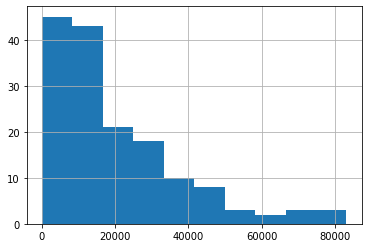

In [ ]:
rent_station['빈도수'].hist()

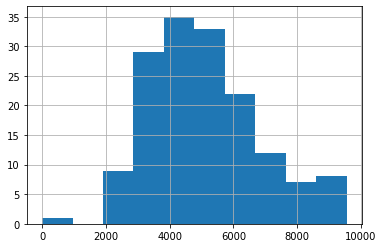

In [ ]:
rent_station['추정 이동 거리_평균'].hist()

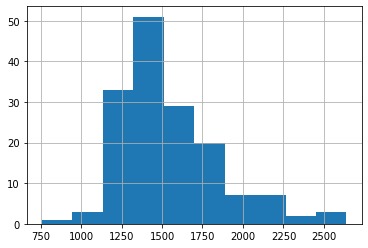

In [ ]:
rent_station['이용 시간(s)_평균'].hist()

In [ ]:
rent_station.merge(bike_station_loc, how = 'left', left_on = '대여 스테이션 번호', right_on = 'Station_ID').columns

Index(['대여 스테이션 번호', '빈도수', '추정 이동 거리_평균', '이용 시간(s)_평균', '추정 이동 거리_중간값',
       '이용 시간(s)_중간값', 'Station_ID', 'STATION_NAME', '거치대 수량', '위도', '경도'],
      dtype='object')

In [ ]:
rent_station = rent_station.merge(bike_station_loc, how = 'left', left_on = '대여 스테이션 번호', right_on = 'Station_ID')[['대여 스테이션 번호', 'STATION_NAME', '빈도수', '추정 이동 거리_평균', '이용 시간(s)_평균', '추정 이동 거리_중간값',
       '이용 시간(s)_중간값', '위도', '경도']]
rent_station

,대여 스테이션 번호,STATION_NAME,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값,위도,경도
0,101,어울림마을 701동 앞,8366,8183.640771,1798.343772,0.0,1286.0,37.654775,126.834584
1,103,대림e-편한세상106동,4535,8904.187950,2172.741345,0.0,1702.0,37.660442,126.840377
2,104,탄현마을8단지,13402,4807.637471,1418.641994,0.0,734.0,37.698523,126.766042
3,105,KT 덕양지사 앞,2806,6629.972838,2094.704918,0.0,1540.0,37.655244,126.839261
4,106,원당역 앞 공영주차장,4444,5545.947696,1702.017777,0.0,868.0,37.653410,126.842530
...,...,...,...,...,...,...,...,...,...
151,349,★고양시 여성창업지원센터 옆,7532,7339.916376,1986.795406,0.0,910.5,37.697838,126.752642
152,350,★하이파크5단지 502동앞 버스정류장,4190,6893.054086,1728.124821,0.0,1029.0,37.697867,126.753089
153,351,◆일산에듀포레 푸르지오,473,2542.583832,1187.437632,0.0,621.0,37.702259,126.767231
154,992,★피프틴센터,952,2847.526185,1206.882353,0.0,543.0,37.637529,126.833760


In [ ]:
top78_rent = rent_station.sort_values(by ='빈도수', ascending=False).reset_index().iloc[:78].dropna()
top78_rent

,index,대여 스테이션 번호,STATION_NAME,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값,위도,경도
0,97,253,★호수공원 (강선17단지 삼거리),83134,3360.193236,2493.808767,0.0,2324.0,37.663241,126.762162
1,98,254,★호수공원 제3주차장 (MBC맞은편),78594,2755.577707,2638.747691,0.0,2513.0,37.655647,126.768352
2,118,309,★주엽역 6번출구 앞,78272,5558.772007,1510.956242,0.0,642.0,37.671278,126.761898
3,103,259,★웨스턴돔 입구,70746,6721.295985,1880.509626,0.0,1295.0,37.656722,126.771620
4,58,210,★남정씨티프라자 옆,69549,6521.986383,2001.838272,0.0,940.0,37.663673,126.767099
...,...,...,...,...,...,...,...,...,...,...
73,91,247,안곡중학교 옆,14784,3590.851089,1308.308239,0.0,748.5,37.680703,126.785326
74,13,119,★화정역 4번 출구,14479,8865.204845,1774.215277,0.0,901.0,37.634807,126.832925
75,5,110,어울림누리 맞은편,14138,5445.622710,1551.594921,0.0,798.0,37.647972,126.834469
76,32,144,행신역 앞,13928,5905.192152,1523.711588,0.0,777.0,37.612495,126.833894


In [ ]:
bottom78_rent = rent_station.sort_values(by ='빈도수', ascending=True).reset_index().iloc[:78]
bottom78_rent = bottom78_rent[::-1].dropna()
bottom78_rent

,index,대여 스테이션 번호,STATION_NAME,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값,위도,경도
77,2,104,탄현마을8단지,13402,4807.637471,1418.641994,0.0,734.0,37.698523,126.766042
76,86,238,풍동 휴먼시아3단지 301동 앞,13353,4849.245686,1449.590354,0.0,869.0,37.667753,126.795507
75,143,340,일산역 본일산 방면,12915,4252.103270,1371.277197,0.0,655.0,37.682513,126.769861
74,102,258,★고속종합터미널 출구,12907,6099.292881,1852.065701,0.0,1456.0,37.642158,126.790087
73,88,240,숲속마을로 사거리,12556,6323.161585,1691.965435,0.0,1165.0,37.672973,126.800918
...,...,...,...,...,...,...,...,...,...,...
5,154,992,★피프틴센터,952,2847.526185,1206.882353,0.0,543.0,37.637529,126.833760
4,109,265,◆원시티 육교,767,2615.066052,1241.894394,0.0,705.0,37.661296,126.750847
3,108,264,◆킨텍스 사거리,688,2717.214153,1166.300872,0.0,717.0,37.664403,126.748019
2,153,351,◆일산에듀포레 푸르지오,473,2542.583832,1187.437632,0.0,621.0,37.702259,126.767231


In [ ]:
rent_station.columns

Index(['대여 스테이션 번호', 'STATION_NAME', '빈도수', '추정 이동 거리_평균', '이용 시간(s)_평균',
       '추정 이동 거리_중간값', '이용 시간(s)_중간값', '위도', '경도'],
      dtype='object')

In [ ]:
# 전체 대여 스테이션 

import folium
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
lat = rent_station['위도'].mean()
longi = rent_station['경도'].mean()
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

try:
  for i in rent_station.index: 
    sub_lat = rent_station.loc[i, '위도']
    sub_long = rent_station.loc[i, '경도']
    title = f"{rent_station.loc[i, '대여 스테이션 번호']}"
    folium.CircleMarker([sub_lat, sub_long],
        tooltip = title, radius = 0.0001*rent_station.loc[i,'빈도수'], color = 'blue' ).add_to(m)
except:
  pass

m

In [ ]:
# 상위 78 하위 78 대여소 구분 

import folium
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
lat = bottom78_rent['위도'].mean()
longi = bottom78_rent['경도'].mean()
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for i in top78_rent.index: 
  sub_lat = top78_rent.loc[i, '위도']
  sub_long = top78_rent.loc[i, '경도']
  title_top = f"{top78_rent.loc[i, '대여 스테이션 번호']}"
  folium.CircleMarker([sub_lat, sub_long],
      tooltip = title_top, radius = 0.0001*top78_rent.loc[i,'빈도수'], color = 'blue' ).add_to(m)


for i in bottom78_rent.index: 
  sub_lat = bottom78_rent.loc[i, '위도']
  sub_long = bottom78_rent.loc[i, '경도']
  title = f"{bottom78_rent.loc[i, '대여 스테이션 번호']}"
  folium.CircleMarker([sub_lat, sub_long],
      tooltip = title, radius = 0.0001*bottom78_rent.loc[i,'빈도수'], color = 'red' ).add_to(m)


m

반납스테이션 분석

In [ ]:
bike_general.columns

In [ ]:
return_station = bike_general.groupby('반납 스테이션 번호', as_index = False).count()[['반납 스테이션 번호']]
return_station[['빈도수']]= bike_general.groupby('반납 스테이션 번호', as_index = False).count()[['Unnamed: 0']]
return_station[['추정 이동 거리_평균', '이용 시간(s)_평균']]= bike_general.groupby('반납 스테이션 번호', as_index = False).mean()[['추정 이동 거리', '이용 시간(s)']]
return_station[['추정 이동 거리_중간값', '이용 시간(s)_중간값']]= bike_general.groupby('반납 스테이션 번호', as_index = False).median()[['추정 이동 거리', '이용 시간(s)']]

return_station

In [ ]:
return_station['빈도수'].hist()

In [ ]:
return_station['추정 이동 거리_평균'].hist()

In [ ]:
return_station['이용 시간(s)_평균'].hist()

In [ ]:
return_station = return_station.merge(bike_station_loc, how = 'left', left_on = '반납 스테이션 번호', right_on = 'Station_ID')[['반납 스테이션 번호', 'STATION_NAME', '빈도수', '추정 이동 거리_평균', '이용 시간(s)_평균', '추정 이동 거리_중간값',
       '이용 시간(s)_중간값', '위도', '경도']]
return_station

In [ ]:
top78_return = return_station.sort_values(by ='빈도수', ascending=False).reset_index().iloc[:78].dropna()
top78_return

,index,반납 스테이션 번호,STATION_NAME,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값,위도,경도
1,98,253,★호수공원 (강선17단지 삼거리),83718,0.000000,2464.679507,0.0,2292.0,37.663241,126.762162
2,99,254,★호수공원 제3주차장 (MBC맞은편),81279,0.000000,2699.185780,0.0,2583.0,37.655647,126.768352
3,119,309,★주엽역 6번출구 앞,75719,0.000000,916.446678,0.0,425.0,37.671278,126.761898
4,59,210,★남정씨티프라자 옆,72191,0.000000,1171.457952,0.0,738.0,37.663673,126.767099
5,104,259,★웨스턴돔 입구,70482,0.000000,1463.347621,0.0,909.0,37.656722,126.771620
...,...,...,...,...,...,...,...,...,...,...
73,144,340,일산역 본일산 방면,12904,6305.351441,1020.655223,0.0,376.0,37.682513,126.769861
74,94,249,중산8단지 사거리,12213,9381.438713,1427.042987,0.0,815.0,37.687329,126.780547
75,87,238,풍동 휴먼시아3단지 301동 앞,11545,9369.745258,1149.121091,0.0,783.0,37.667753,126.795507
76,10,114,★덕양구청,11326,0.000000,1258.177291,0.0,654.0,37.636688,126.831526


In [ ]:
bottom78_return = return_station.sort_values(by ='빈도수', ascending=True).reset_index().iloc[:78]
bottom78_return = bottom78_return[::-1].dropna()
bottom78_return

,index,반납 스테이션 번호,STATION_NAME,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값,위도,경도
77,92,247,안곡중학교 옆,10700,9599.529252,1240.552430,0.0,731.0,37.680703,126.785326
76,103,258,★고속종합터미널 출구,10677,0.000000,1531.842746,0.0,1039.0,37.642158,126.790087
75,12,116,세이브존 앞,10634,6165.472823,1148.795279,0.0,635.0,37.634360,126.831342
74,137,328,현산초교 사거리,10406,6750.549491,1145.300596,0.0,582.0,37.693468,126.773297
73,95,250,중산동중앙공원 앞,10351,9137.001353,1691.629601,0.0,999.0,37.691855,126.779973
...,...,...,...,...,...,...,...,...,...,...
6,110,265,◆원시티 육교,973,0.000000,1130.682425,0.0,794.0,37.661296,126.750847
5,155,992,★피프틴센터,795,0.000000,916.324528,0.0,368.0,37.637529,126.833760
4,109,264,◆킨텍스 사거리,759,0.000000,1202.982872,0.0,865.0,37.664403,126.748019
3,108,263,◆원시티 정문,425,0.000000,1261.167059,0.0,985.0,37.661579,126.747736


In [ ]:
import folium
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
lat = bottom78_return['위도'].mean()
longi = bottom78_return['경도'].mean()
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for i in top78_return.index: 
  sub_lat = top78_return.loc[i, '위도']
  sub_long = top78_return.loc[i, '경도']
  title = f"{top78_return.loc[i, '반납 스테이션 번호']}"
  folium.CircleMarker([sub_lat, sub_long],
      tooltip= title, radius = 0.0001*top78_return.loc[i,'빈도수'], color = 'green' ).add_to(m)

for i in bottom78_return.index: 
  sub_lat = bottom78_return.loc[i, '위도']
  sub_long = bottom78_return.loc[i, '경도']
  title = f"{bottom78_return.loc[i, '반납 스테이션 번호']}"
  folium.CircleMarker([sub_lat, sub_long],
     tooltip = title, radius = 0.0001*bottom78_return.loc[i,'빈도수'], color = 'purple' ).add_to(m)

m

In [ ]:
# 대여 / 반납 스테이션 상위 하위 시각화

import folium
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
lat = bottom78_return['위도'].mean()
longi = bottom78_return['경도'].mean()
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for i in top78_rent.index: 
  sub_lat = top78_rent.loc[i, '위도']
  sub_long = top78_rent.loc[i, '경도']
  # title = top78_rent.loc[i, '대여 스테이션 번호'] + " - " + top78_rent.loc[i, 'STATION_NAME']
  folium.CircleMarker([sub_lat, sub_long],
      radius = 0.00015*top78_rent.loc[i,'빈도수'], color = 'blue').add_to(m) #구분하기 위해 지름을 좀 더 크게함. 


for i in bottom78_rent.index: 
  sub_lat = bottom78_rent.loc[i, '위도']
  sub_long = bottom78_rent.loc[i, '경도']
  # title = bottom78_rent.loc[i, '대여 스테이션 번호'] + " - " + bottom78_rent.loc[i, 'STATION_NAME']
  folium.CircleMarker([sub_lat, sub_long],
      radius = 0.00015*bottom78_rent.loc[i,'빈도수'], color = 'purple').add_to(m) 

for i in top78_return.index: 
  sub_lat = top78_return.loc[i, '위도']
  sub_long = top78_return.loc[i, '경도']
  # title = top78_return.loc[i, '대여 스테이션 번호'] + " - " + top78_return.loc[i, 'STATION_NAME']
  folium.CircleMarker([sub_lat, sub_long],
      radius = 0.0001*top78_return.loc[i,'빈도수'], color = 'red').add_to(m)

for i in bottom78_return.index: 
  sub_lat = bottom78_return.loc[i, '위도']
  sub_long = bottom78_return.loc[i, '경도']
  # title = bottom78_return.loc[i, '대여 스테이션 번호'] + " - " + bottom78_return.loc[i, 'STATION_NAME']
  folium.CircleMarker([sub_lat, sub_long],
      radius = 0.0001*bottom78_return.loc[i,'빈도수'], color = 'orange').add_to(m)

m

## 1. 구간 동일한 기록들 EDA

In [ ]:
bike_general.columns

Index(['Unnamed: 0', '대여 번호', '대여 시간', '대여 스테이션 번호', '대여 거치대 번호', '반납 시간',
       '반납 스테이션 번호', '반납 거치대 번호', '추정 이동 거리', '회원 구분', '회원 번호', '비회원 번호',
       '자전거 번호', '관제 반납', '이용 시간(s)'],
      dtype='object')

In [ ]:
bike_general['구간'] = bike_general.apply(lambda x: str(x['대여 스테이션 번호'])+ "-" + str(x['반납 스테이션 번호']), axis =1)

In [ ]:
print('대여 스테이션 개수')
print(len(bike_general['대여 스테이션 번호'].unique()))
print('------------')
print('반납 스테이션 개수')
print(len(bike_general['반납 스테이션 번호'].unique()))
print('------------')
print('이동구간 개수')
len(bike_general['구간'].unique())

대여 스테이션 개수
156
------------
반납 스테이션 개수
158
------------
이동구간 개수


16171

In [ ]:
bike_general.to_csv('자전거 정류장_구간 추가.csv', index = False)

In [ ]:
bike_general

,Unnamed: 0,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s),구간
0,0,15945541,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN,791.0,213-260
1,1,15945542,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN,2961.0,231-231
2,2,15945543,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0,119-0
3,3,15945544,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN,829.0,121-133
4,4,15945545,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN,912.0,320-259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,3142683,21718608,2019-12-31 23:52:39,222,16,2019-12-31 23:58:56,219,24,0.0,3,236957,0.0,1A84400000F881,NaN,377.0,222-219
3142684,3142684,21718610,2019-12-31 23:53:59,343,14,2019-12-31 23:57:59,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN,240.0,343-311
3142685,3142685,21718611,2019-12-31 23:55:27,333,17,2020-01-01 00:06:24,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN,657.0,333-322
3142686,3142686,21718613,2019-12-31 23:59:14,264,4,2020-01-01 00:10:39,210,13,0.0,12,180671,0.0,1A84400000F804,NaN,685.0,264-210


In [ ]:
구간_count = bike_general.groupby('구간', as_index = False).count()[['구간']]
구간_count[['구간', '빈도수']] = bike_general.groupby('구간', as_index = False).count()[['구간', '대여 스테이션 번호']]
구간_count[['추정 이동 거리_평균', '이용 시간(s)_평균']] = bike_general.groupby('구간', as_index = False).mean()[['추정 이동 거리', '이용 시간(s)']]
구간_count[['추정 이동 거리_중간값', '이용 시간(s)_중간값']] = bike_general.groupby('구간', as_index = False).mean()[['추정 이동 거리', '이용 시간(s)']]
구간_count

,구간,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값
0,101-0,1115,9187.666667,2848.930942,9187.666667,2848.930942
1,101-101,1187,10815.037911,2138.652064,10815.037911,2138.652064
2,101-103,336,5119.425595,1245.955357,5119.425595,1245.955357
3,101-105,94,5934.765957,1921.648936,5934.765957,1921.648936
4,101-106,213,4279.981221,815.596244,4279.981221,815.596244
...,...,...,...,...,...,...
16166,992-309,1,0.000000,3108.000000,0.000000,3108.000000
16167,992-331,1,65535.000000,3023.000000,65535.000000,3023.000000
16168,992-992,315,0.000000,927.346032,0.000000,927.346032
16169,998-0,4,NaN,3503.250000,NaN,3503.250000


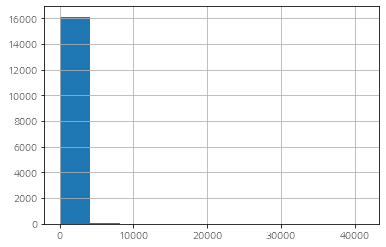

In [ ]:
구간_count['빈도수'].hist()

In [ ]:
# 1000이상 670개 
구간_count[구간_count['빈도수']>= 1000].sort_values('빈도수', ascending=False)

,구간,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값
10067,254-254,41251,0.000000,2847.163705,0.000000,2847.163705
9923,253-253,40052,0.000000,2844.482897,0.000000,2844.482897
4940,207-207,17932,0.000000,2449.957841,0.000000,2449.957841
9791,252-252,15563,0.000000,2949.641650,0.000000,2949.641650
12210,309-0,11785,4731.400000,3254.615443,4731.400000,3254.615443
...,...,...,...,...,...,...
6014,217-233,1005,3985.541294,1175.344279,3985.541294,1175.344279
12607,312-210,1004,0.000000,633.989044,0.000000,633.989044
4427,203-205,1003,10569.910269,914.070788,10569.910269,914.070788
6271,219-256,1003,3369.647059,577.173480,3369.647059,577.173480


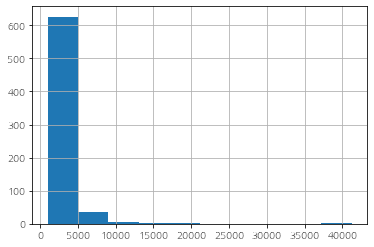

In [ ]:
구간_count[구간_count['빈도수']>= 1000].sort_values('빈도수', ascending=False)['빈도수'].hist()

In [ ]:
구간_count[구간_count['빈도수']>= 10000]

,구간,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값
4940,207-207,17932,0.000000,2449.957841,0.000000,2449.957841
9791,252-252,15563,0.000000,2949.641650,0.000000,2949.641650
9923,253-253,40052,0.000000,2844.482897,0.000000,2844.482897
10067,254-254,41251,0.000000,2847.163705,0.000000,2847.163705
12210,309-0,11785,4731.400000,3254.615443,4731.400000,3254.615443
12344,310-0,10368,7194.578125,3145.476466,7194.578125,3145.476466


In [ ]:
bike_station_loc[bike_station_loc['Station_ID'] == 310], bike_station_loc[bike_station_loc['Station_ID'] == 309], bike_station_loc[bike_station_loc['Station_ID'] == 207], bike_station_loc[bike_station_loc['Station_ID'] == 252], bike_station_loc[bike_station_loc['Station_ID'] == 253], bike_station_loc[bike_station_loc['Station_ID'] == 254]

(     Station_ID STATION_NAME  거치대 수량         위도          경도
 126         310   ★주엽역 2번 출구      30  37.669687  126.761237,
      Station_ID STATION_NAME  거치대 수량         위도          경도
 125         309  ★주엽역 6번출구 앞      30  37.671278  126.761898,
     Station_ID   STATION_NAME  거치대 수량         위도          경도
 62         207  ★호수공원 제4주차장 뒤      30  37.649994  126.771965,
      Station_ID    STATION_NAME  거치대 수량         위도          경도
 103         252  ★일산문화공원 홈플러스 앞      30  37.657596  126.768253,
      Station_ID        STATION_NAME  거치대 수량         위도          경도
 104         253  ★호수공원 (강선17단지 삼거리)      30  37.663241  126.762162,
      Station_ID          STATION_NAME  거치대 수량         위도          경도
 105         254  ★호수공원 제3주차장 (MBC맞은편)      30  37.655647  126.768352)

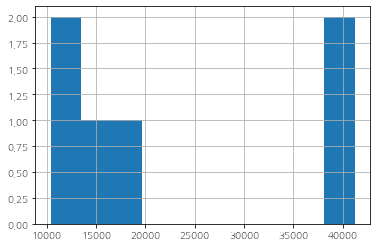

In [ ]:
구간_count[구간_count['빈도수']>= 10000].sort_values('빈도수', ascending=False)['빈도수'].hist()

In [ ]:
구간_count[구간_count['빈도수']>= 5000].sort_values('빈도수', ascending=False)

,구간,빈도수,추정 이동 거리_평균,이용 시간(s)_평균,추정 이동 거리_중간값,이용 시간(s)_중간값
10067,254-254,41251,0.000000,2847.163705,0.000000,2847.163705
9923,253-253,40052,0.000000,2844.482897,0.000000,2844.482897
4940,207-207,17932,0.000000,2449.957841,0.000000,2449.957841
9791,252-252,15563,0.000000,2949.641650,0.000000,2949.641650
12210,309-0,11785,4731.400000,3254.615443,4731.400000,3254.615443
12344,310-0,10368,7194.578125,3145.476466,7194.578125,3145.476466
5033,210-0,9441,2774.555556,6553.610105,2774.555556,6553.610105
10635,259-0,9329,3075.288136,3144.437989,3075.288136,3144.437989
15290,342-0,8678,4170.214286,3114.612123,4170.214286,3114.612123
7377,229-0,8492,7365.681818,3286.905676,7365.681818,3286.905676


## 추정이동거리 vs 실제 거리

In [ ]:
bike_general

,Unnamed: 0,대여 번호,대여 시간,대여 스테이션 번호,대여 거치대 번호,반납 시간,반납 스테이션 번호,반납 거치대 번호,추정 이동 거리,회원 구분,회원 번호,비회원 번호,자전거 번호,관제 반납,이용 시간(s)
0,0,15945541,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN,791.0
1,1,15945542,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN,2961.0
2,2,15945543,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0,3600.0
3,3,15945544,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN,829.0
4,4,15945545,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN,912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,3142683,21718608,2019-12-31 23:52:39,222,16,2019-12-31 23:58:56,219,24,0.0,3,236957,0.0,1A84400000F881,NaN,377.0
3142684,3142684,21718610,2019-12-31 23:53:59,343,14,2019-12-31 23:57:59,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN,240.0
3142685,3142685,21718611,2019-12-31 23:55:27,333,17,2020-01-01 00:06:24,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN,657.0
3142686,3142686,21718613,2019-12-31 23:59:14,264,4,2020-01-01 00:10:39,210,13,0.0,12,180671,0.0,1A84400000F804,NaN,685.0


In [ ]:
station_distance

,Unnamed: 0,sta_rent,sta_return,이동거리
0,0,101,101,0.000000
1,1,101,103,810.593473
2,2,101,104,7749.401651
3,3,101,105,414.953376
4,4,101,106,715.798911
...,...,...,...,...
26891,26891,992,350,9768.976190
26892,26892,992,351,9278.739241
26893,26893,992,352,8104.699800
26894,26894,992,353,7993.663782


In [ ]:
bike_distance = bike_general.merge(station_distance, how = 'left', left_on =['대여 스테이션 번호', '반납 스테이션 번호'], right_on = ['sta_rent', 'sta_return'])
bike_distance = bike_distance[['대여 번호','대여 스테이션 번호', '반납 스테이션 번호', '대여 시간', '반납 시간','추정 이동 거리', '이동거리','이용 시간(s)', '관제 반납', '회원 구분']]
bike_distance

,대여 번호,대여 스테이션 번호,반납 스테이션 번호,대여 시간,반납 시간,추정 이동 거리,이동거리,이용 시간(s),관제 반납,회원 구분
0,15945541,213,260,2017-01-01 00:00:41,2017-01-01 00:13:52,0.0,1707.564955,791.0,NaN,6
1,15945542,231,231,2017-01-01 00:01:03,2017-01-01 00:50:24,31039.0,0.000000,2961.0,NaN,1
2,15945543,119,0,2017-01-01 00:01:50,2017-01-01 01:01:50,NaN,NaN,3600.0,1.0,12
3,15945544,121,133,2017-01-01 00:02:09,2017-01-01 00:15:58,15490.0,1540.791742,829.0,NaN,12
4,15945545,320,259,2017-01-01 00:03:32,2017-01-01 00:18:44,0.0,2986.440762,912.0,NaN,12
...,...,...,...,...,...,...,...,...,...,...
3142683,21718608,222,219,2019-12-31 23:52:39,2019-12-31 23:58:56,0.0,457.455286,377.0,NaN,3
3142684,21718610,343,311,2019-12-31 23:53:59,2019-12-31 23:57:59,0.0,537.352433,240.0,NaN,99
3142685,21718611,333,322,2019-12-31 23:55:27,2020-01-01 00:06:24,0.0,1220.866991,657.0,NaN,99
3142686,21718613,264,210,2019-12-31 23:59:14,2020-01-01 00:10:39,0.0,1681.444150,685.0,NaN,12


In [ ]:
bike_distance = bike_distance.astype({'대여 스테이션 번호':object, '반납 스테이션 번호':object})
bike_distance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142688 entries, 0 to 3142687
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   대여 번호       int64  
 1   대여 스테이션 번호  object 
 2   반납 스테이션 번호  object 
 3   대여 시간       object 
 4   반납 시간       object 
 5   추정 이동 거리    float64
 6   이동거리        float64
 7   이용 시간(s)    float64
 8   관제 반납       float64
 9   회원 구분       object 
dtypes: float64(4), int64(1), object(5)
memory usage: 263.7+ MB


In [ ]:
bike_distance.describe(include='all')

,대여 번호,대여 스테이션 번호,반납 스테이션 번호,대여 시간,반납 시간,추정 이동 거리,이동거리,이용 시간(s),관제 반납,회원 구분
count,3.142688e+06,3142688.0,3142688.0,3142688,3142688,2.747029e+06,2.744423e+06,3.142688e+06,410039.000000,3142688.0
unique,NaN,156.0,158.0,3056724,3044089,NaN,NaN,NaN,NaN,31.0
top,NaN,253.0,0.0,2019-06-28 12:56:14,2019-10-04 17:15:08,NaN,NaN,NaN,NaN,3.0
freq,NaN,83134.0,398234.0,4,23,NaN,NaN,NaN,NaN,816117.0
mean,1.882270e+07,NaN,NaN,NaN,NaN,4.895855e+03,1.221959e+03,1.576582e+03,1.121984,NaN
std,1.674327e+06,NaN,NaN,NaN,NaN,1.264047e+04,1.066624e+03,1.827212e+04,0.590959,NaN
min,1.594554e+07,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,NaN
25%,1.735176e+07,NaN,NaN,NaN,NaN,0.000000e+00,5.106683e+02,4.250000e+02,1.000000,NaN
50%,1.883170e+07,NaN,NaN,NaN,NaN,0.000000e+00,1.001666e+03,8.520000e+02,1.000000,NaN
75%,2.029006e+07,NaN,NaN,NaN,NaN,0.000000e+00,1.677543e+03,2.108000e+03,1.000000,NaN


In [ ]:
# 추정 이동 거리가 0인 데이터 
bike_distance_zero = pd.concat([bike_distance[bike_distance['추정 이동 거리'] == 0], bike_distance[bike_distance['추정 이동 거리'] == "NaN"]])
bike_distance_zero

,대여 번호,대여 스테이션 번호,반납 스테이션 번호,대여 시간,반납 시간,추정 이동 거리,이동거리,이용 시간(s),관제 반납,회원 구분
0,15945541,213,260,2017-01-01 00:00:41,2017-01-01 00:13:52,0.0,1707.564955,791.0,NaN,6
4,15945545,320,259,2017-01-01 00:03:32,2017-01-01 00:18:44,0.0,2986.440762,912.0,NaN,12
5,15945546,309,210,2017-01-01 00:03:40,2017-01-01 00:10:50,0.0,961.566087,430.0,NaN,99
7,15945549,307,305,2017-01-01 00:07:55,2017-01-01 00:11:42,0.0,565.188827,227.0,NaN,12
9,15945551,231,210,2017-01-01 00:12:34,2017-01-01 00:22:47,0.0,1547.420706,613.0,NaN,12
...,...,...,...,...,...,...,...,...,...,...
3142682,21718607,210,316,2019-12-31 23:51:54,2020-01-01 00:23:08,0.0,1820.184618,1874.0,NaN,2
3142683,21718608,222,219,2019-12-31 23:52:39,2019-12-31 23:58:56,0.0,457.455286,377.0,NaN,3
3142684,21718610,343,311,2019-12-31 23:53:59,2019-12-31 23:57:59,0.0,537.352433,240.0,NaN,99
3142685,21718611,333,322,2019-12-31 23:55:27,2020-01-01 00:06:24,0.0,1220.866991,657.0,NaN,99


In [ ]:
# 결측치 제거 
bike_distance = bike_distance.dropna(subset =['추정 이동 거리'])
bike_distance = bike_distance[bike_distance['추정 이동 거리'] != 0]
bike_distance

,대여 번호,대여 스테이션 번호,반납 스테이션 번호,대여 시간,반납 시간,추정 이동 거리,이동거리,이용 시간(s),관제 반납,회원 구분
1,15945542,231,231,2017-01-01 00:01:03,2017-01-01 00:50:24,31039.0,0.000000,2961.0,NaN,1
3,15945544,121,133,2017-01-01 00:02:09,2017-01-01 00:15:58,15490.0,1540.791742,829.0,NaN,12
6,15945547,232,213,2017-01-01 00:06:42,2017-01-01 00:15:43,8948.0,1132.386334,541.0,NaN,99
8,15945550,114,113,2017-01-01 00:10:30,2017-01-01 00:13:14,17482.0,358.236282,164.0,NaN,12
11,15945554,215,231,2017-01-01 00:15:04,2017-01-01 00:29:16,15170.0,1421.808272,852.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...
3142652,21718570,306,303,2019-12-31 23:15:04,2019-12-31 23:16:57,3041.0,424.711935,113.0,NaN,12
3142657,21718575,311,319,2019-12-31 23:19:42,2019-12-31 23:25:31,14111.0,945.692402,349.0,NaN,3
3142668,21718588,245,226,2019-12-31 23:32:27,2019-12-31 23:44:19,38894.0,891.427263,712.0,NaN,12
3142673,21718596,252,218,2019-12-31 23:36:53,2019-12-31 23:51:17,37720.0,1534.712830,864.0,NaN,2


In [ ]:
bike_distance['거리 비교'] = bike_distance['추정 이동 거리'] - bike_distance['이동거리']

In [ ]:
bike_distance['이동거리'].describe()

count    659765.000000
mean       1266.065316
std        1090.937660
min           0.000000
25%         552.024129
50%        1028.045035
75%        1654.779657
max       12721.682595
Name: 이동거리, dtype: float64

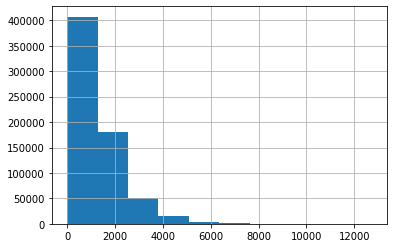

In [ ]:
bike_distance['이동거리'].hist()

In [ ]:
rent_sta = dict(list(bike_distance.groupby(by = '대여 스테이션 번호')))
rent_sta

{101:             대여 번호 대여 스테이션 번호 반납 스테이션 번호  ... 관제 반납 회원 구분         거리 비교
 886      15947212        101        101  ...   NaN    99  40829.000000
 899      15947229        101        101  ...   NaN    99  41297.000000
 1583     15948342        101        101  ...   NaN    12      8.000000
 2417     15949904        101        125  ...   NaN    99  62467.668571
 2883     15950708        101        110  ...   NaN    99  26648.518583
 ...           ...        ...        ...  ...   ...   ...           ...
 3135457  21704372        101        116  ...   NaN    12  -2286.844211
 3136963  21707384        101        101  ...   NaN     3  65535.000000
 3138722  21710856        101        110  ...   NaN     3  64778.518583
 3139079  21711373        101        111  ...   NaN    24  11681.122203
 3142559  21718404        101        101  ...   NaN     3  44769.000000
 
 [2580 rows x 11 columns],
 103:             대여 번호 대여 스테이션 번호 반납 스테이션 번호  ... 관제 반납 회원 구분         거리 비교
 76       15945632       

In [ ]:
rent_sta[253].groupby('반납 스테이션 번호').count().sort_values(by= '대여 번호', ascending =False)

,대여 번호,대여 스테이션 번호,대여 시간,반납 시간,추정 이동 거리,이동거리,이용 시간(s),관제 반납,회원 구분,거리 비교
반납 스테이션 번호,,,,,,,,,,
345,384,384,384,384,384,384,384,3,384,384
318,368,368,368,368,368,368,368,0,368,368
302,314,314,314,314,314,314,314,1,314,314
339,287,287,287,287,287,287,287,3,287,287
225,246,246,246,246,246,246,246,1,246,246
...,...,...,...,...,...,...,...,...,...,...
139,1,1,1,1,1,1,1,0,1,1
138,1,1,1,1,1,1,1,0,1,1
130,1,1,1,1,1,1,1,0,1,1


<BarContainer object of 22 artists>

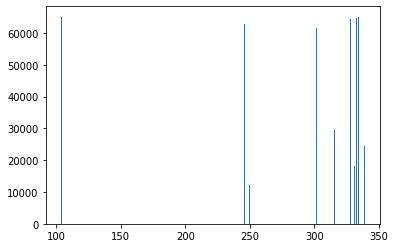

In [ ]:
plt.bar(rent_sta[351]['반납 스테이션 번호'], rent_sta[351]['거리 비교'])

## pydeck 실험

In [2]:
!pip install pydeck

     |████████████████████████████████| 4.4MB 10.2MB/s 
     |████████████████████████████████| 122kB 49.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [3]:
MAPBOX_API_KEY = 'pk.eyJ1Ijoic295ZW9uLW5scCIsImEiOiJja2U5cDBkN2syM2g0MndsdXR2YW1meWc5In0.0_C3owZ4OB3kKo6M9ugOwg'

In [4]:
import pydeck as pdk

In [5]:
bike_distance

NameError: ignored

In [ ]:
bike_station_loc

In [ ]:
bike_distance = bike_distance.merge(bike_station_loc, how = 'left', left_on = '대여 스테이션 번호', right_on = 'Station_ID' )
bike_distance

In [ ]:
bike_distance.columns

In [ ]:
bike_distance.columns = ['대여 번호', '대여 스테이션 번호', '반납 스테이션 번호', '대여 시간', '반납 시간', '추정 이동 거리',
       '이동거리', '이용 시간(s)', '관제 반납', '회원 구분', 'Station_ID', '대여 스테이션 이름',
       '대여_거치대 수량', '대여_위도', '대여_경도']

In [ ]:
bike_distance

In [ ]:
bike_distance = bike_distance.merge(bike_station_loc, how = 'left', left_on = '반납 스테이션 번호', right_on = 'Station_ID' )
bike_distance

In [ ]:
bike_distance.columns

In [ ]:
bike_distance.columns = ['대여 번호', '대여 스테이션 번호', '반납 스테이션 번호', '대여 시간', '반납 시간', '추정 이동 거리',
       '이동거리', '이용 시간(s)', '관제 반납', '회원 구분', 'Station_ID_x', '대여 스테이션 이름',
       '대여_거치대 수량', '대여_위도', '대여_경도', 'Station_ID_y', '반납_스테이션_이름', '반납_거치대 수량',
       '반납_위도', '반납_경도']

In [ ]:
bike_distance = bike_distance[['대여 번호', '대여 스테이션 번호', '대여 스테이션 이름', '반납 스테이션 번호','반납_스테이션_이름', '대여 시간', '반납 시간','추정 이동 거리',
       '이동거리', '이용 시간(s)', '대여_위도', '대여_경도','반납_위도', '반납_경도', '관제 반납']]
bike_distance

In [ ]:
bike_distance = pd.to_csv('정류장 이름 추가.csv', index = False)